<a href="https://colab.research.google.com/github/Sairanga-Putta/Data_Analysis/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

Data Analysis


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape


(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

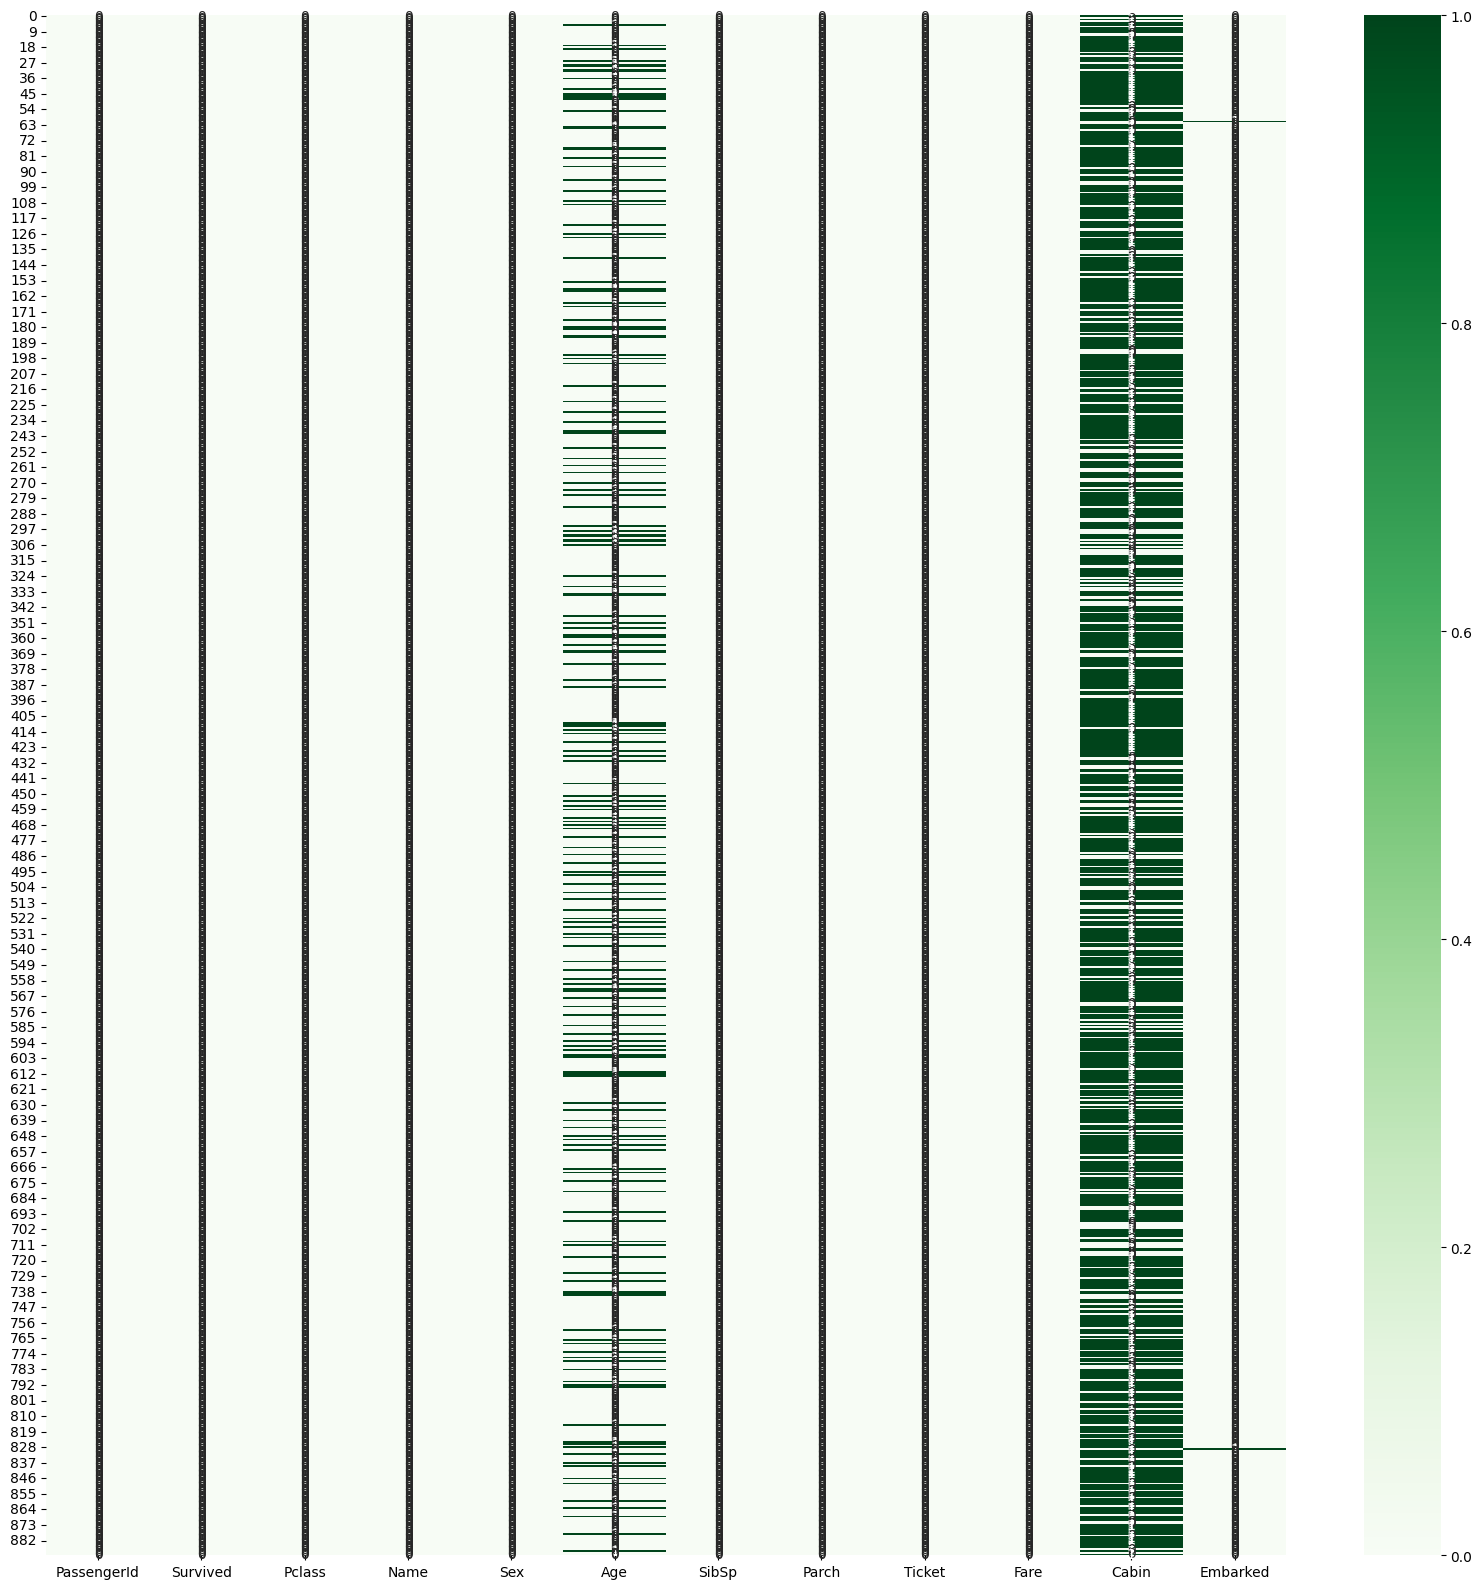

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(),annot=True,cmap='Greens')

In [ ]:
(df.Age.isna().sum()/len(df.Age))*100

19.865319865319865

In [ ]:
df.Cabin.unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
df[df.Pclass==1]['Embarked']

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object

In [ ]:
df.loc[df.Pclass==1,'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Pclass==2,'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [ ]:
df.loc[df.Pclass==3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
#there is no relation between pclass and embarked

In [ ]:
df.loc[df.Fare==80.0,'Embarked'].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
df.loc[df.Ticket==113572,'Embarked'].value_counts()

Series([], Name: Embarked, dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
df.dropna()

In [ ]:
df.Age.mean()

29.64209269662921

In [ ]:
df.Age.median()

28.0

In [ ]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

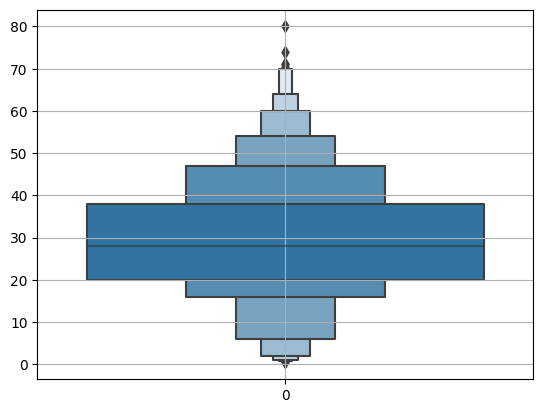

In [ ]:
sns.boxenplot(df.Age)
plt.grid()

In [ ]:
df.Age.fillna(df.Age.median(),inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


In [ ]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

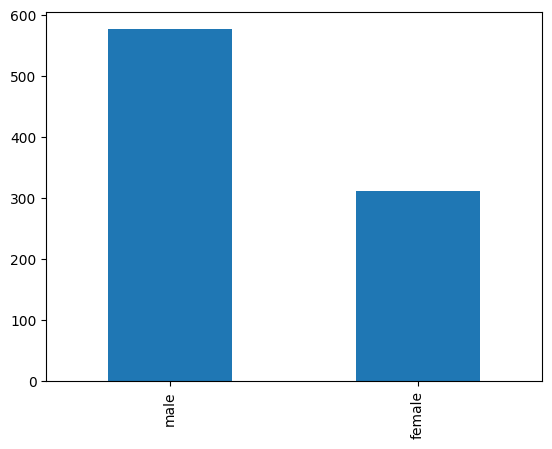

In [ ]:
df.Sex.value_counts().plot.bar(df.Sex)

<Axes: xlabel='Survived,Sex'>

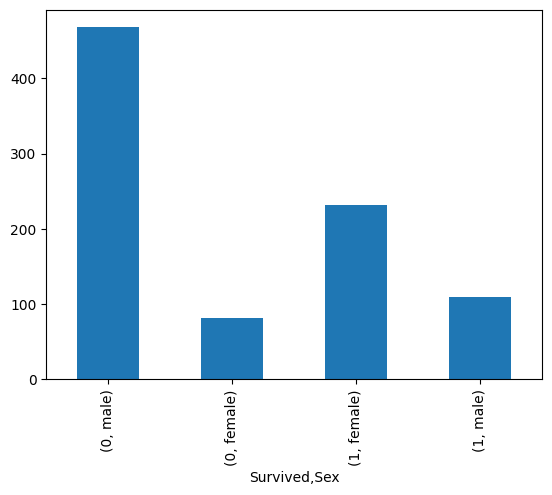

In [ ]:
df.Sex.groupby(df.Survived).value_counts().plot.bar(df.Sex)

<Axes: xlabel='Survived', ylabel='count'>

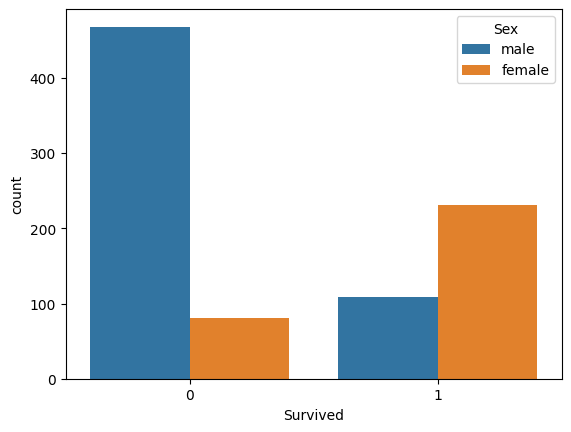

In [ ]:
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: >

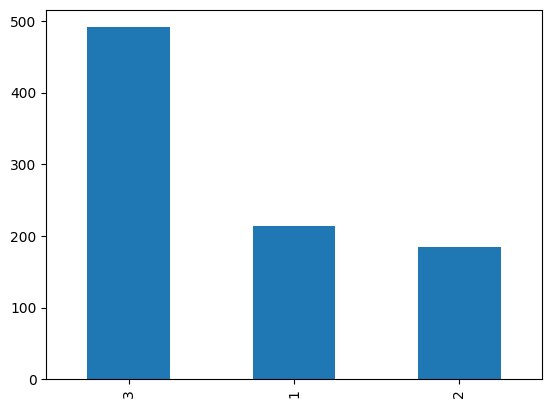

In [ ]:
df.Pclass.value_counts().plot.bar(df.Pclass)

<Axes: xlabel='Survived', ylabel='count'>

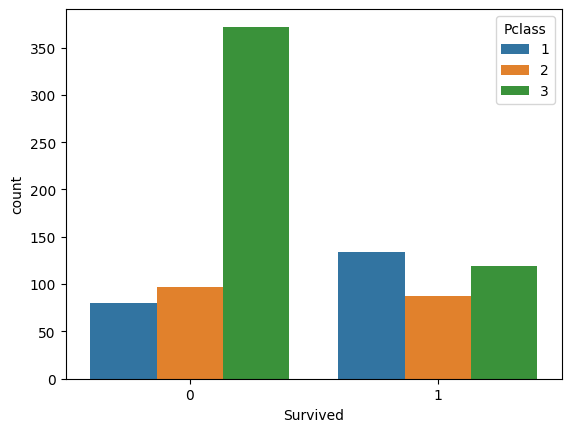

In [ ]:
sns.countplot(x='Survived',data=df,hue='Pclass')

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
encoder=LabelEncoder()

In [ ]:
df.Sex=encoder.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df.Age=df.Age.astype(int)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [ ]:
df.Fare=df.Fare.round(2)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 94.8+ KB


In [ ]:
#as Embarked is a type of Nominal Encodng we use one hot encoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc=OneHotEncoder()

In [ ]:
newdf=df.copy()


In [ ]:
pd.get_dummies(newdf.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
newdf.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df=pd.concat([df,pd.get_dummies(newdf.Embarked)],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 89.6 KB


<Axes: >

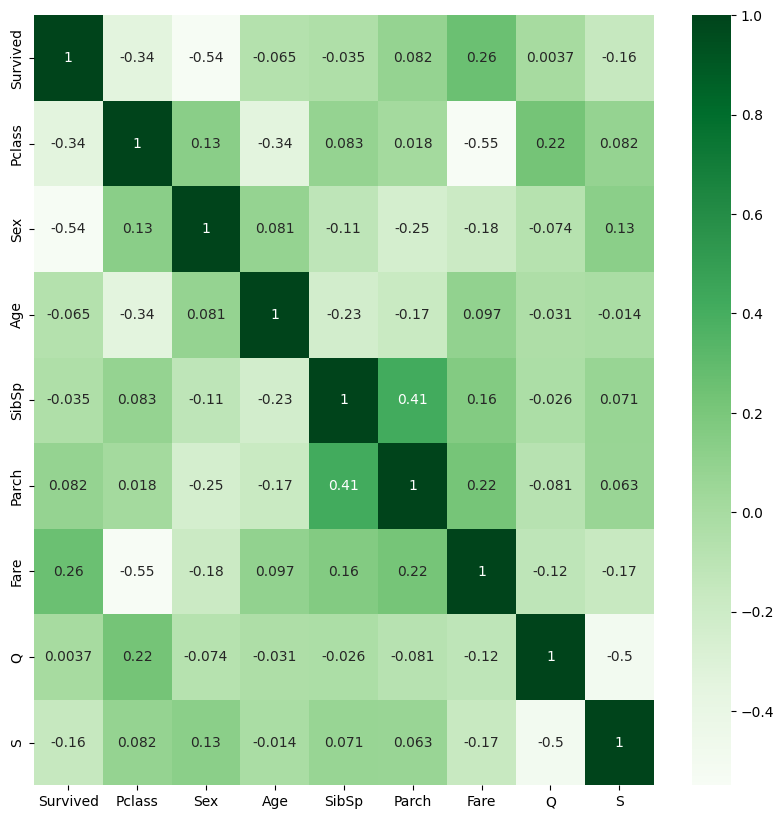

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

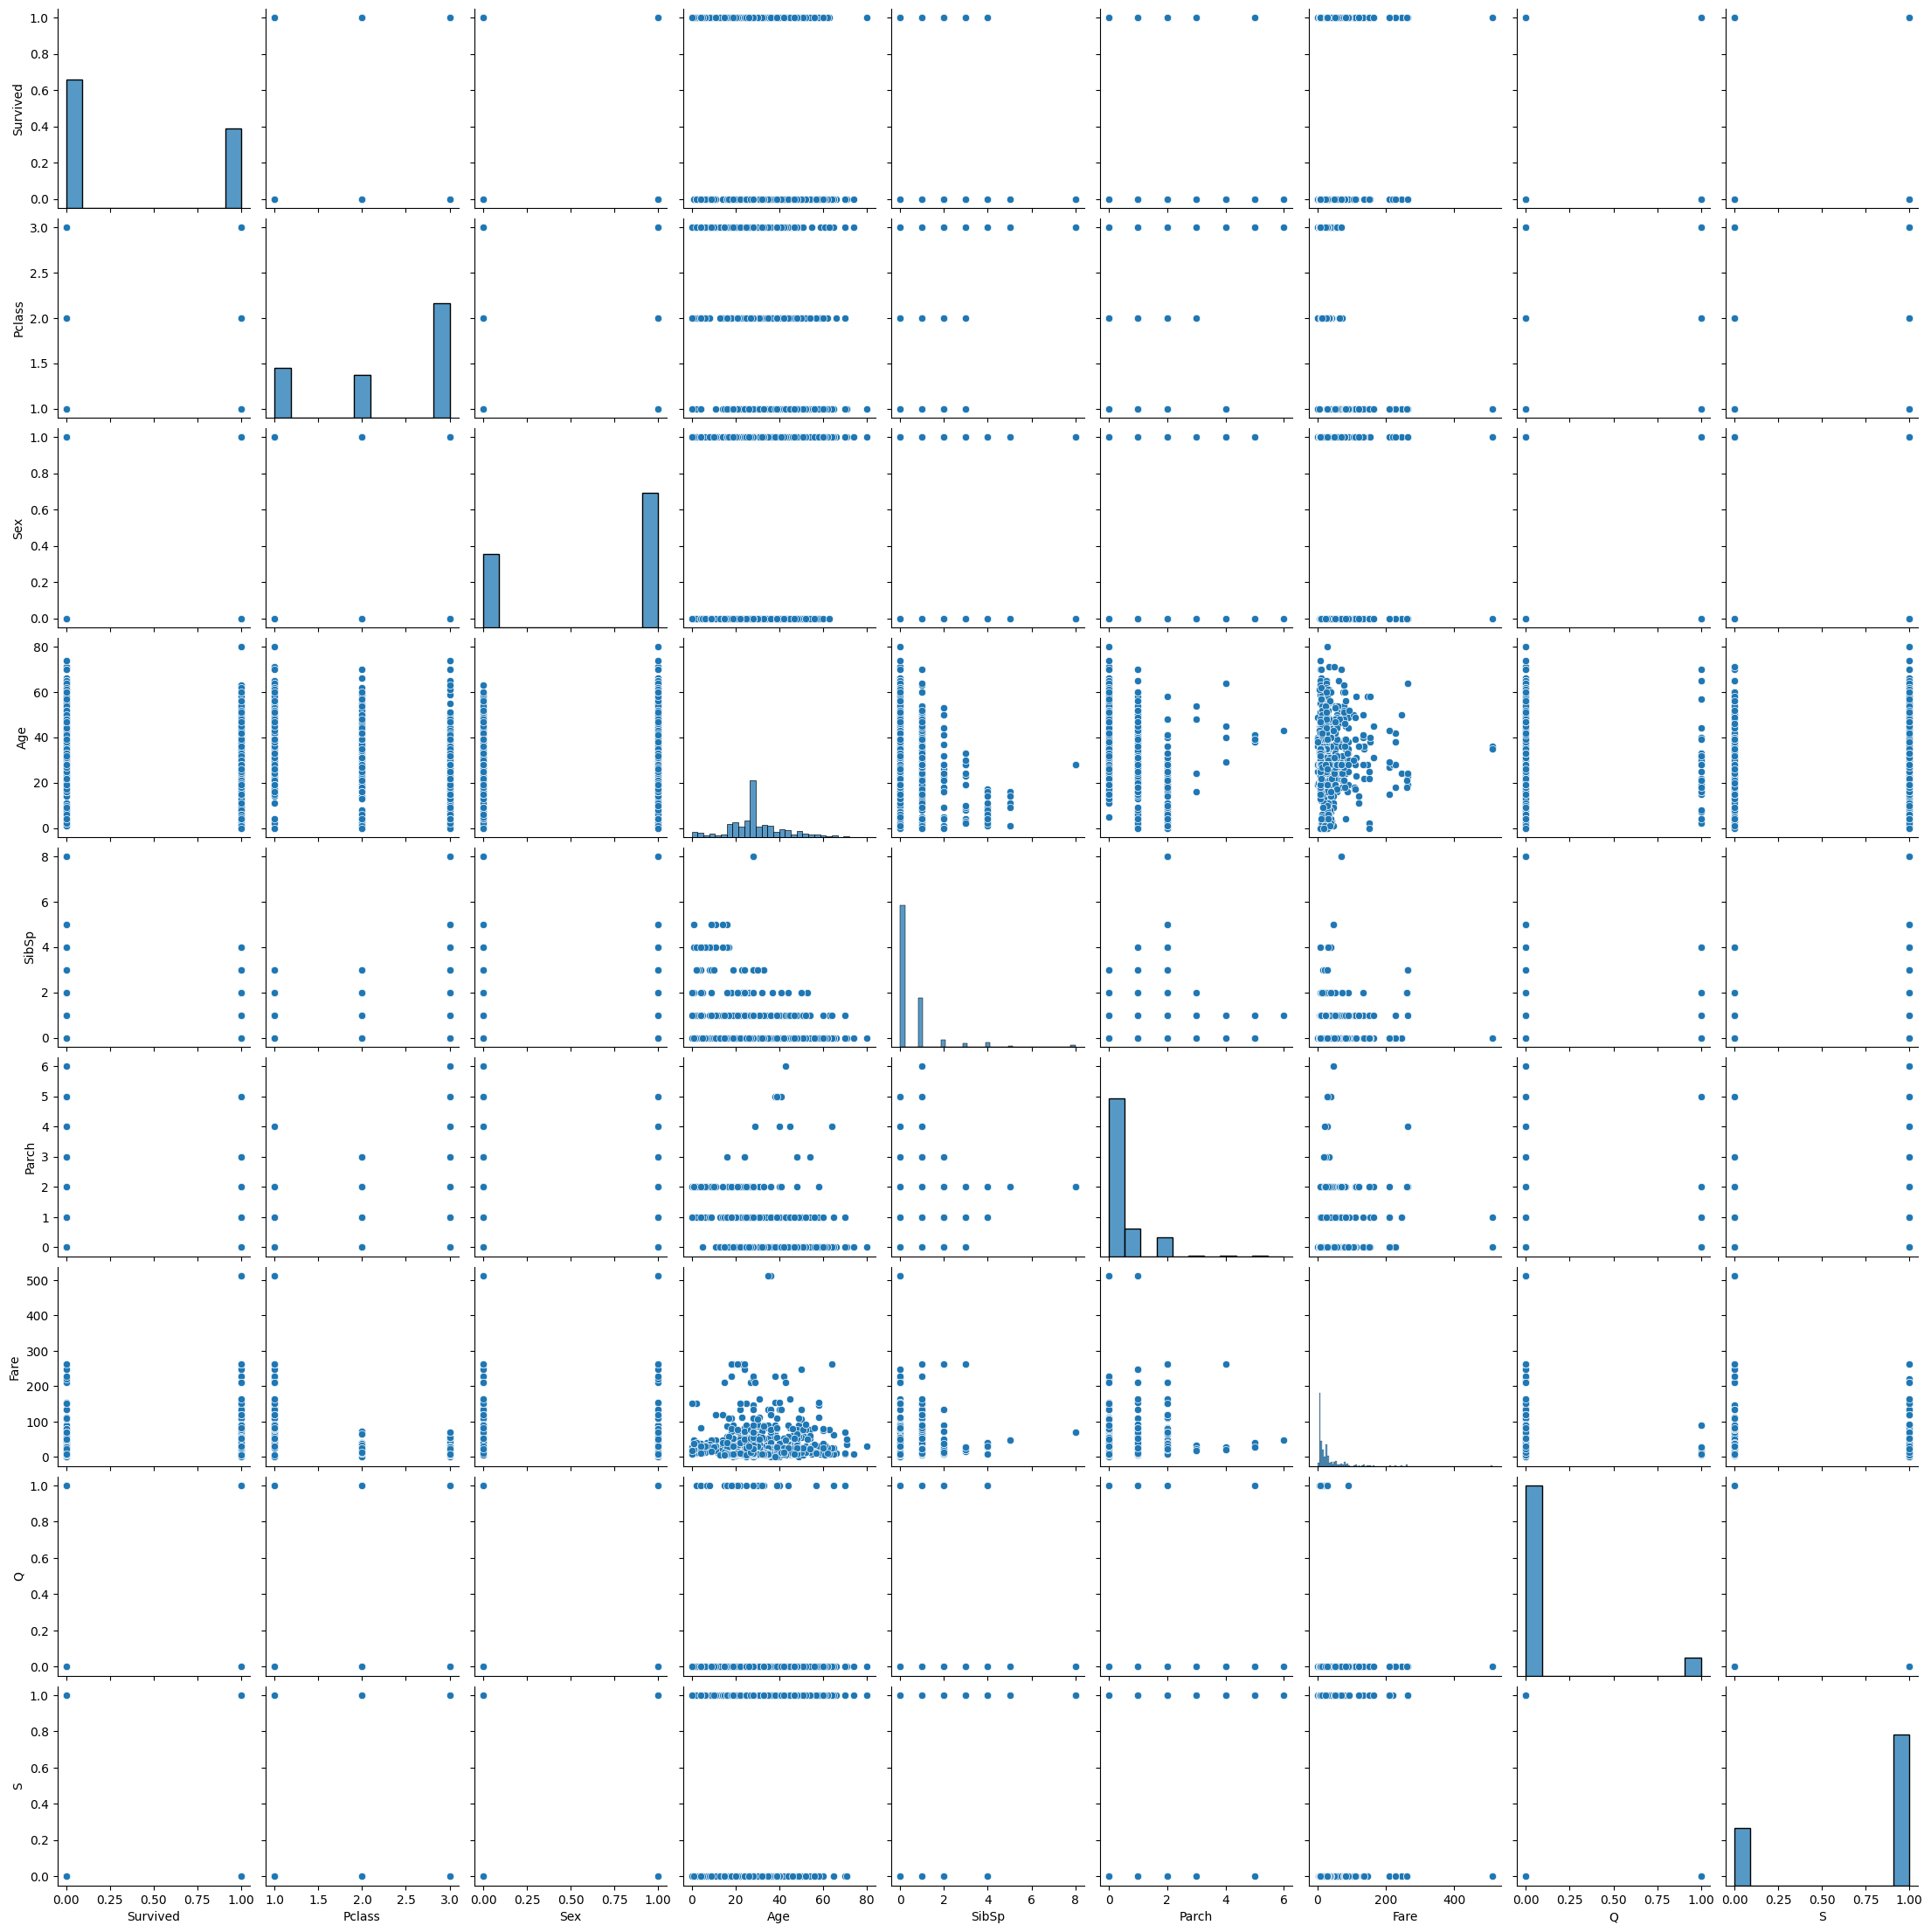

In [ ]:
sns.pairplot(df)

Feature Importance

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat=ExtraTreesClassifier()

In [ ]:
feat.fit(x,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10947017, 0.29007995, 0.24565375, 0.04721663, 0.04241295,
       0.2373094 , 0.0084132 , 0.01944395])

In [ ]:
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)

<Axes: >

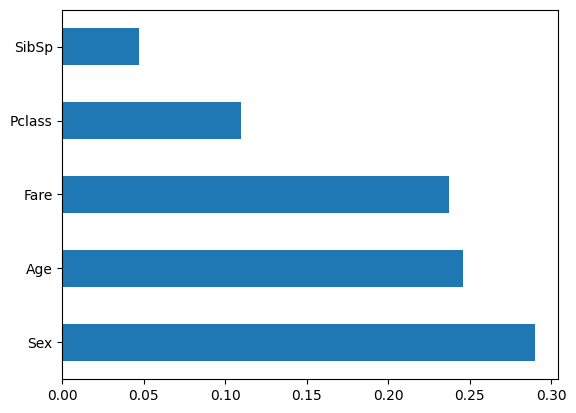

In [ ]:
feat_imp.nlargest(5).plot(kind='barh')

Splitting Data

In [ ]:
skf=StratifiedKFold(n_splits=5)

In [ ]:
for train_index,test_index in skf.split(x,y):
  xtrain,xtest=x.iloc[train_index],x.iloc[test_index]
  ytrain,ytest=y.iloc[train_index],y.iloc[test_index]

In [ ]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.00,0,1
715,3,1,19,0,0,7.65,0,1
718,3,1,28,0,0,15.50,1,0
719,3,1,33,0,0,7.78,0,1


In [ ]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45,0,0,13.50,0,1
707,1,1,42,0,0,26.29,0,1
708,1,0,22,0,0,151.55,0,1
709,3,1,28,1,1,15.25,0,0
710,1,0,24,0,0,49.50,0,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
result=cross_valid_score(df,x,y)

NameError: ignored

training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier=LogisticRegression()

In [ ]:
classifier.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred=classifier.predict(xtest)

In [ ]:
final=pd.DataFrame({'Actual':ytest,'Predicted':ypred})

In [ ]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

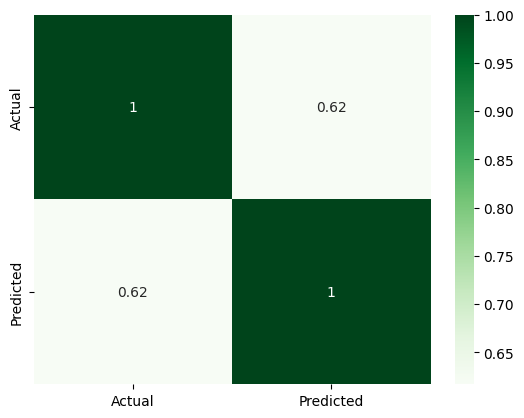

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

Confusion Matrix

In [ ]:
confusion_matrix(ytest,ypred)

array([[98, 11],
       [20, 48]])

In [ ]:
accuracy=(98+48)/(98+11+20+48)
accuracy

0.8248587570621468

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,ypred)

0.8248587570621468

In [ ]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

Exportation of model&dataset


module-pickle
seralisation,deserialisation
picking-unpicking


In [ ]:
#pickle

In [ ]:
import pickle

In [ ]:
pick=pickle.dumps(classifier)

In [ ]:
unpickle=pickle.load(pick)